In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [10]:
quarries = pd.read_csv('/home/bmelo/bin/SeisBlast/files/Eire_blasts_relocated.csv')
quarries_bruna = pd.read_csv(
    '/home/bmelo/bin/Quarry/quarry_new_update1.gmt',
    header=0, 
    sep=r'\s+',
    names=['lon','lat'])
quarries_james = pd.read_csv(
    '/home/bmelo/bin/Quarry/James_files/IRELAND.quarry.coords.txt',
    sep = r'\s+',
    header=None,
    names=['name','co','lat','lon'])
lost_blasts = pd.read_csv(
    '/home/bmelo/bin/SeisBlast/files/Eire_blasts_remain.csv')
lost_blasts
#quarries

,EVENT-ID,DATE,TIME,LAT(deg),LAT-ERR(km),LON(deg),LON-ERR(km),DEPTH(km),RMS(s),AZ-GAP(deg),N_PHASES,MAG(ML)
0,dias2013mmlz,2013-06-27,14:07:25.838,53.31938,0.938,-9.02788,1.059,0.0,0.515,68.7,39,1.48
1,dias2013mvmi,2013-07-02,12:30:23.266,54.87739,2.397,-7.23479,1.671,0.0,0.246,192.2,20,0.75
2,dias2013ofzk,2013-07-22,12:01:18.864,52.64743,2.114,-6.29972,2.986,0.0,0.320,217.7,19,1.17
3,dias2013qvol,2013-08-28,11:43:31.139,54.31406,0.998,-6.59969,1.190,0.0,0.471,75.1,42,1.18
4,dias2013tqqz,2013-10-07,11:55:57.790,52.63535,2.254,-6.28756,2.972,0.0,0.323,220.6,16,1.02
5,dias2013tsuh,2013-10-08,15:52:34.028,54.11798,0.894,-8.18018,1.432,0.0,0.638,78.2,33,1.03
6,dias2013xuit,2013-12-05,10:28:00.234,52.64296,2.387,-6.25784,3.424,0.0,0.223,228.6,13,1.06
7,dias2013yoqm,2013-12-16,13:05:48.624,53.91484,0.941,-6.70759,1.386,0.0,0.506,81.1,31,1.43
8,dias2014bwms,2014-01-27,12:56:27.589,54.89190,4.860,-7.24362,2.097,0.0,0.344,205.9,13,0.55
9,dias2014gxyx,2014-04-09,11:56:04.517,52.63129,2.057,-6.29983,1.667,0.0,0.440,147.6,17,1.18


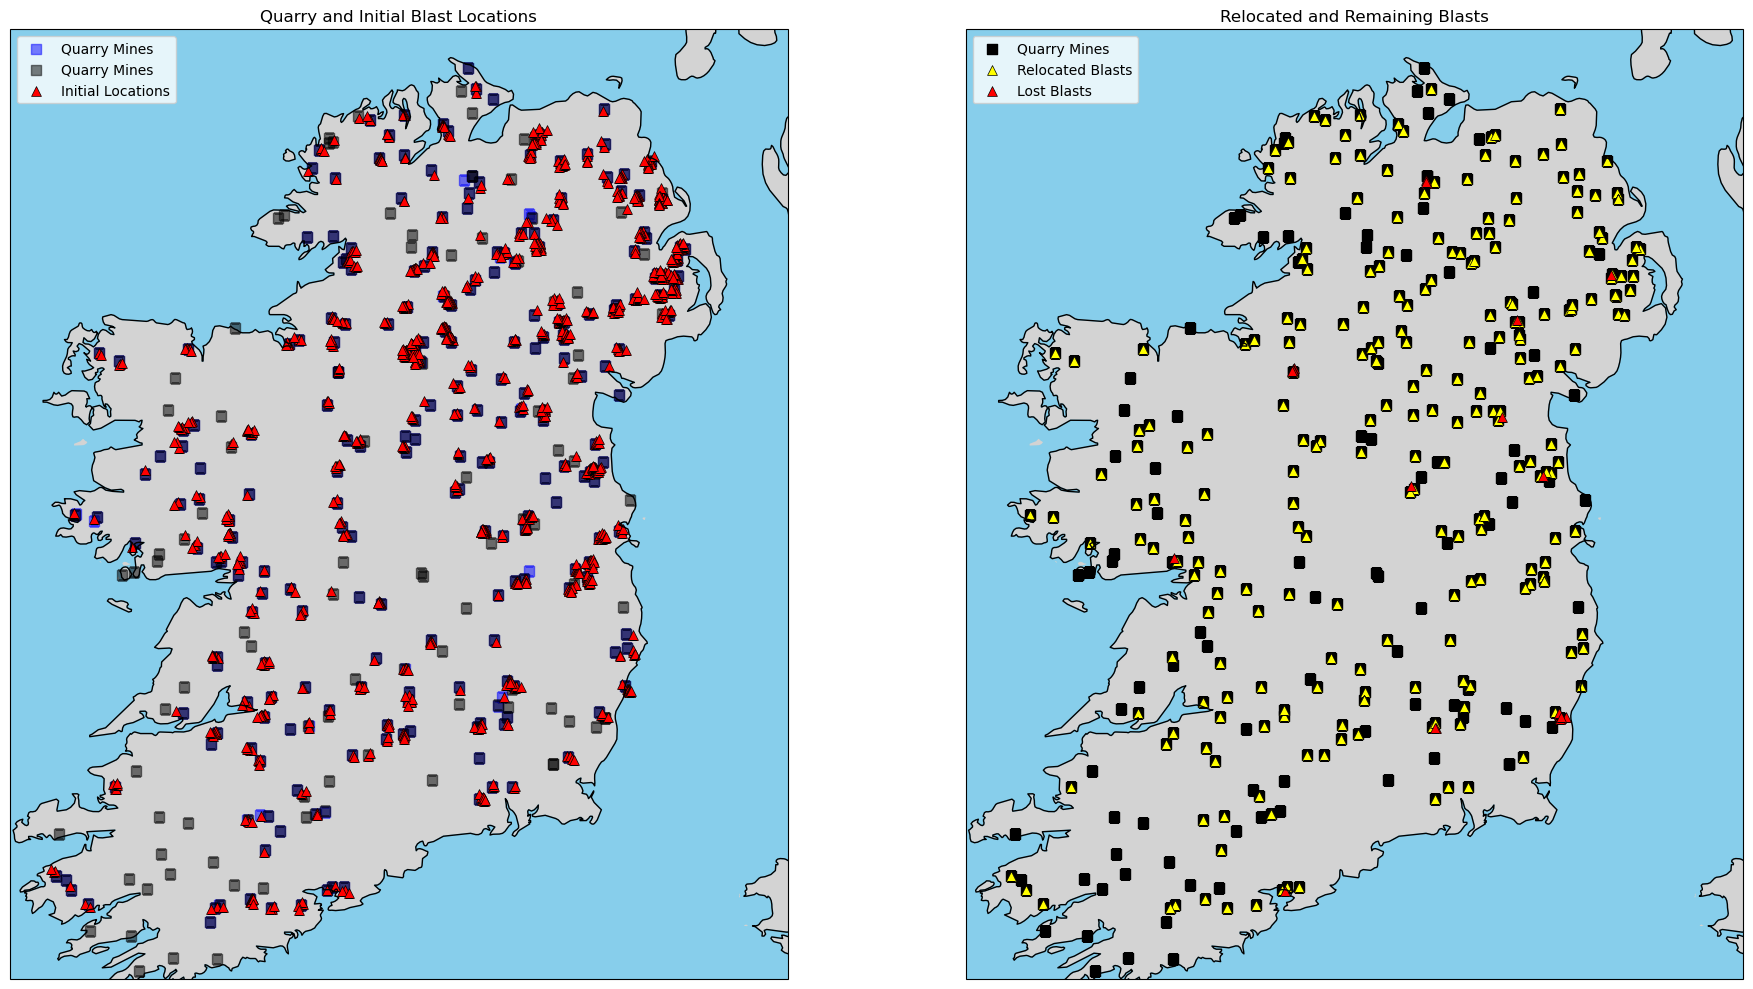

In [12]:
# Define the region as (min_lon, max_lon, min_lat, max_lat)
region = [-10.5, -5, 51.5, 55.5]  # Replace with your actual region

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10),
                         subplot_kw={"projection": ccrs.Mercator()})

# Common settings for both subplots
for ax in axes:
    ax.set_extent(region, crs=ccrs.PlateCarree())  # Set map region
    ax.add_feature(cfeature.LAND, color="lightgray")
    ax.add_feature(cfeature.OCEAN, color="skyblue")
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    # ---- First Panel ----
ax1 = axes[0]
ax1.set_title("Quarry and Initial Blast Locations")

ax1.scatter(quarries_bruna["lon"], quarries_bruna["lat"],
            color="blue", marker="s", s=50, alpha=0.5, label="Quarry Mines",
            transform=ccrs.PlateCarree())

# Plot quarry mine locations (black squares)
ax1.scatter(quarries_james["lon"], quarries_james["lat"],
            color="black", marker="s", s=50, alpha=0.5, label="Quarry Mines",
            transform=ccrs.PlateCarree())

# Plot initial blast locations (green triangles)
ax1.scatter(quarries["lon_ev"], quarries["lat_ev"],
            color="red", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Initial Locations",
            transform=ccrs.PlateCarree())

ax1.legend(loc="upper left")

# ---- Second Panel ----
ax2 = axes[1]
ax2.set_title("Relocated and Remaining Blasts")

# Plot quarry mine locations (black squares)
ax2.scatter(quarries_james["lon"], quarries_james["lat"],
            color="black", marker="s", s=50, label="Quarry Mines",
            transform=ccrs.PlateCarree())

# Plot relocated blasts (green triangles)
ax2.scatter(quarries["lon-quarry"], quarries["lat-quarry"],
            color="yellow", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Relocated Blasts",
            transform=ccrs.PlateCarree())

# Plot relocated blasts (green triangles)
ax2.scatter(lost_blasts["LON(deg)"], lost_blasts["LAT(deg)"],
            color="red", marker="^", s=50,
            edgecolors="black", linewidth=0.5,
            label="Lost Blasts",
            transform=ccrs.PlateCarree())

ax2.legend(loc="upper left")

# Show the final map
plt.tight_layout()
plt.show()